<img src="Downloads/Asus ROG Strix G17 G712LU-EV019T 17_3 Laptop Price in India.jfif" alt="Image Title" width="800" />

## when i finished the model traning i found there is overfiting because the performance of the model in the traning is high and with a diffrence between the performance in test 

## so that need to add more features to the model for that i extract the information from the memory column and add two columns one for the type and one for the size also i did that with the column screen resolution and add two features one for scrren type and one for the resolution all that with nlp skills for the model to better undertsand the data and for the user because it is important data

In [1206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import re
from sklearn.linear_model import Ridge
from sklearn.ensemble import StackingRegressor

In [1207]:
df=pd.read_csv("Desktop/Data/laptop_price.csv",sep=",",encoding="latin1")
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [1208]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [1209]:
memory_type=[]
memory_size=[]
screen_res=[]
screen_type=[]
for row in df["Memory"]:
    res=re.sub("\d{1,3}GB||\dTB","",row)
    memory_type.append(res)
for i, row in df.iterrows():
    df.loc[i, "Memory"] = re.sub(r"\dTB", "1000", row["Memory"])
for row in df["Memory"]:
    res_size=re.sub("[a-zA-Z]","",row)
    memory_size.append(res_size)
for row in df["ScreenResolution"]:
    res_reso=re.findall("\d{1,6}x\d{1,6}",row)
    screen_res.append(res_reso)
for row in df["ScreenResolution"]:
    pattern = "IPS|Full\s+HD|Touchscreen|\d{1}K|Quad\s+HD\+"
    res_type=re.findall(pattern,row)
    screen_type.append(res_type)

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hp\AppData\Local\Temp\ipykernel_13668\3664090281.py:6: SyntaxWarning: invalid escape sequence '\d'
  res=re.sub("\d{1,3}GB||\dTB","",row)
C:\Users\hp\AppData\Local\Temp\ipykernel_13668\3664090281.py:14: SyntaxWarning: invalid escape sequence '\d'
  res_reso=re.findall("\d{1,6}x\d{1,6}",row)
C:\Users\hp\AppData\Local\Temp\ipykernel_13668\3664090281.py:17: SyntaxWarning: invalid escape sequence '\s'
  pattern = "IPS|Full\s+HD|Touchscreen|\d{1}K|Quad\s+HD\+"


In [1210]:
memory_type=pd.DataFrame(memory_type,columns=["memory type"])
memory_size=pd.DataFrame(memory_size,columns=["memory size"])
screen_res=pd.DataFrame(screen_res,columns=["screen resolution"])
screen_type=pd.DataFrame(screen_type,columns=["screen type","screen type2","screen type3"])

In [1211]:
df=pd.concat([df,memory_type,memory_size,screen_res,screen_type],axis=1)

In [1212]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [1213]:
df.drop("Memory",inplace=True,axis=1)
df.drop("ScreenResolution",inplace=True,axis=1)

In [1214]:
df.loc[pd.isna(df["screen type"]), "screen type"] =""
df.loc[pd.isna(df["screen type2"]),"screen type2"]=""
df.loc[pd.isna(df["screen type3"]),"screen type3"]=""

In [1215]:
screen_type=[]
for i in range(len(df)):
   screen_type.append(df["screen type"][i]+" "+df["screen type2"][i]+" "+df["screen type3"][i])

In [1216]:
screen_type=pd.DataFrame(screen_type,columns=["Screen Type"])
df=pd.concat([df,screen_type],axis=1)

In [1217]:
df.drop("screen type",inplace=True,axis=1)
df.drop("screen type2",inplace=True,axis=1)
df.drop("screen type3",inplace=True,axis=1)

In [1218]:
df[:10]

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,memory type,memory size,screen resolution,Screen Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,SSD,128,2560x1600,IPS
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Flash Storage,128,1440x900,
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,SSD,256,1920x1080,Full HD
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,SSD,512,2880x1800,IPS
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,SSD,256,2560x1600,IPS
5,6,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420 3GHz,4GB,AMD Radeon R5,Windows 10,2.1kg,400.00,HDD,500,1366x768,
6,7,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.2GHz,16GB,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,Flash Storage,256,2880x1800,IPS
7,8,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,1158.70,Flash Storage,256,1440x900,
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Intel Core i7 8550U 1.8GHz,16GB,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,SSD,512,1920x1080,Full HD
9,10,Acer,Swift 3,Ultrabook,14.0,Intel Core i5 8250U 1.6GHz,8GB,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,SSD,256,1920x1080,IPS Full HD


## here after i taked the screen reslotion only but  it was in string format and i want to integer and i want to calclutae the screen resoltuin so i divide the two numbers then i multinplie them

In [1220]:
num1=[]
num2=[]
for row in df["screen resolution"]:
    res1=re.sub("x\d{2,6}","",row)
    num1.append(res1)
    res2=re.sub("\d{2,6}x","",row)
    num2.append(res2)


print(num1[0])
print(num2[0])


2560
1600


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_13668\1245124602.py:4: SyntaxWarning: invalid escape sequence '\d'
  res1=re.sub("x\d{2,6}","",row)
C:\Users\hp\AppData\Local\Temp\ipykernel_13668\1245124602.py:6: SyntaxWarning: invalid escape sequence '\d'
  res2=re.sub("\d{2,6}x","",row)


In [1221]:
int_num1=list(map(int,num1))
int_num2=list(map(int,num2))
screen_reso=[]
for i in range(len(num1)):
    screen_reso.append(int_num1[i]*int_num2[i])

screen_reso=pd.DataFrame(screen_reso,columns=["Screen Resolution"])
df=pd.concat([df,screen_reso],axis=1)

In [1222]:
df.drop("screen resolution",inplace=True,axis=1)

## here i remove all the memory size that have + signe and put the acualy value of it

In [1224]:
# Replace the string "128  +  1000" with the string "1128" in the "memory size" column
df["memory size"] = df["memory size"].replace(to_replace=r'\s*128\s*\+\s*1000\s*', value='1128', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*512\s*\+\s*1000\s*', value='1512', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*256\s*\+\s*1000\s*', value='1256', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*1.1000\s*', value='1000', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*256\s*\+\s*256\s*', value='512', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*256\s*\+\s*500\s*', value='756', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*512\s*\+\s*256\s*', value='768', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*64\s*\+\s*1000\s*', value='1064', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*512\s*\+\s*512\s*', value='1024', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*1000\s*\+\s*1000\s*', value='2000', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*256\s*\+\s*1000\s*', value='1256', regex=True)
df["memory size"] = df["memory size"].replace(to_replace=r'\s*512\s*\+\s*1000\s*', value='1512', regex=True)



print(df["memory size"].value_counts())

memory size
256      412
1000     253
500      132
512      118
1128      96
1256      84
128       77
32        38
1512      18
64        15
1000      10
256        8
16         7
32         7
180        5
128        4
2000       3
16         3
512        2
512        2
756        2
768        1
1064       1
1024       1
64         1
240        1
8          1
508        1
Name: count, dtype: int64


In [1225]:
df["memory size"]=df["memory size"].astype(int)

In [1226]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,memory type,memory size,Screen Type,Screen Resolution
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,SSD,128,IPS,4096000
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Flash Storage,128,,1296000
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,SSD,256,Full HD,2073600
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,SSD,512,IPS,5184000
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,SSD,256,IPS,4096000


In [1227]:
GHZ=[]
for row in df["Cpu"]:
    res=re.findall("([0-9\.]*)GHz",row)
    GHZ.append(res)
GHZ=pd.DataFrame(GHZ,columns=["GHz"])
df=pd.concat([df,GHZ],axis=1)
df

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\hp\AppData\Local\Temp\ipykernel_13668\112235389.py:3: SyntaxWarning: invalid escape sequence '\.'
  res=re.findall("([0-9\.]*)GHz",row)


,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,memory type,memory size,Screen Type,Screen Resolution,GHz
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,SSD,128,IPS,4096000,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Flash Storage,128,,1296000,1.8
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,SSD,256,Full HD,2073600,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,SSD,512,IPS,5184000,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,SSD,256,IPS,4096000,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,Intel HD Graphics 520,Windows 10,1.8kg,638.00,SSD,128,IPS Full HD Touchscreen,2073600,2.5
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,SSD,512,IPS Quad HD+ Touchscreen,5760000,2.5
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,Intel HD Graphics,Windows 10,1.5kg,229.00,Flash Storage,64,,1049088,1.6
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,HDD,1000,,1049088,2.5


In [1228]:
df["GHz"]=df["GHz"].astype(float)

## here is the last version i reached after applied the nlp techinces to take the information that i want 

In [1230]:
df[:10]

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,memory type,memory size,Screen Type,Screen Resolution,GHz
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,SSD,128,IPS,4096000,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,Flash Storage,128,,1296000,1.8
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00,SSD,256,Full HD,2073600,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,SSD,512,IPS,5184000,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,SSD,256,IPS,4096000,3.1
5,6,Acer,Aspire 3,Notebook,15.6,AMD A9-Series 9420 3GHz,4GB,AMD Radeon R5,Windows 10,2.1kg,400.00,HDD,500,,1049088,3.0
6,7,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.2GHz,16GB,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97,Flash Storage,256,IPS,5184000,2.2
7,8,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,1158.70,Flash Storage,256,,1296000,1.8
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Intel Core i7 8550U 1.8GHz,16GB,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00,SSD,512,Full HD,2073600,1.8
9,10,Acer,Swift 3,Ultrabook,14.0,Intel Core i5 8250U 1.6GHz,8GB,Intel UHD Graphics 620,Windows 10,1.6kg,770.00,SSD,256,IPS Full HD,2073600,1.6


In [1231]:
df.shape

(1303, 16)

In [1232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   laptop_ID          1303 non-null   int64  
 1   Company            1303 non-null   object 
 2   Product            1303 non-null   object 
 3   TypeName           1303 non-null   object 
 4   Inches             1303 non-null   float64
 5   Cpu                1303 non-null   object 
 6   Ram                1303 non-null   object 
 7   Gpu                1303 non-null   object 
 8   OpSys              1303 non-null   object 
 9   Weight             1303 non-null   object 
 10  Price_euros        1303 non-null   float64
 11  memory type        1303 non-null   object 
 12  memory size        1303 non-null   int32  
 13  Screen Type        1303 non-null   object 
 14  Screen Resolution  1303 non-null   int64  
 15  GHz                1303 non-null   float64
dtypes: float64(3), int32(1),

### i removed the id column because it's not importatnt in data analysis or in ml learning and it will not help us to detect the duplicates

In [1234]:
df.drop("laptop_ID",axis=1,inplace=True)

<Axes: ylabel='count'>

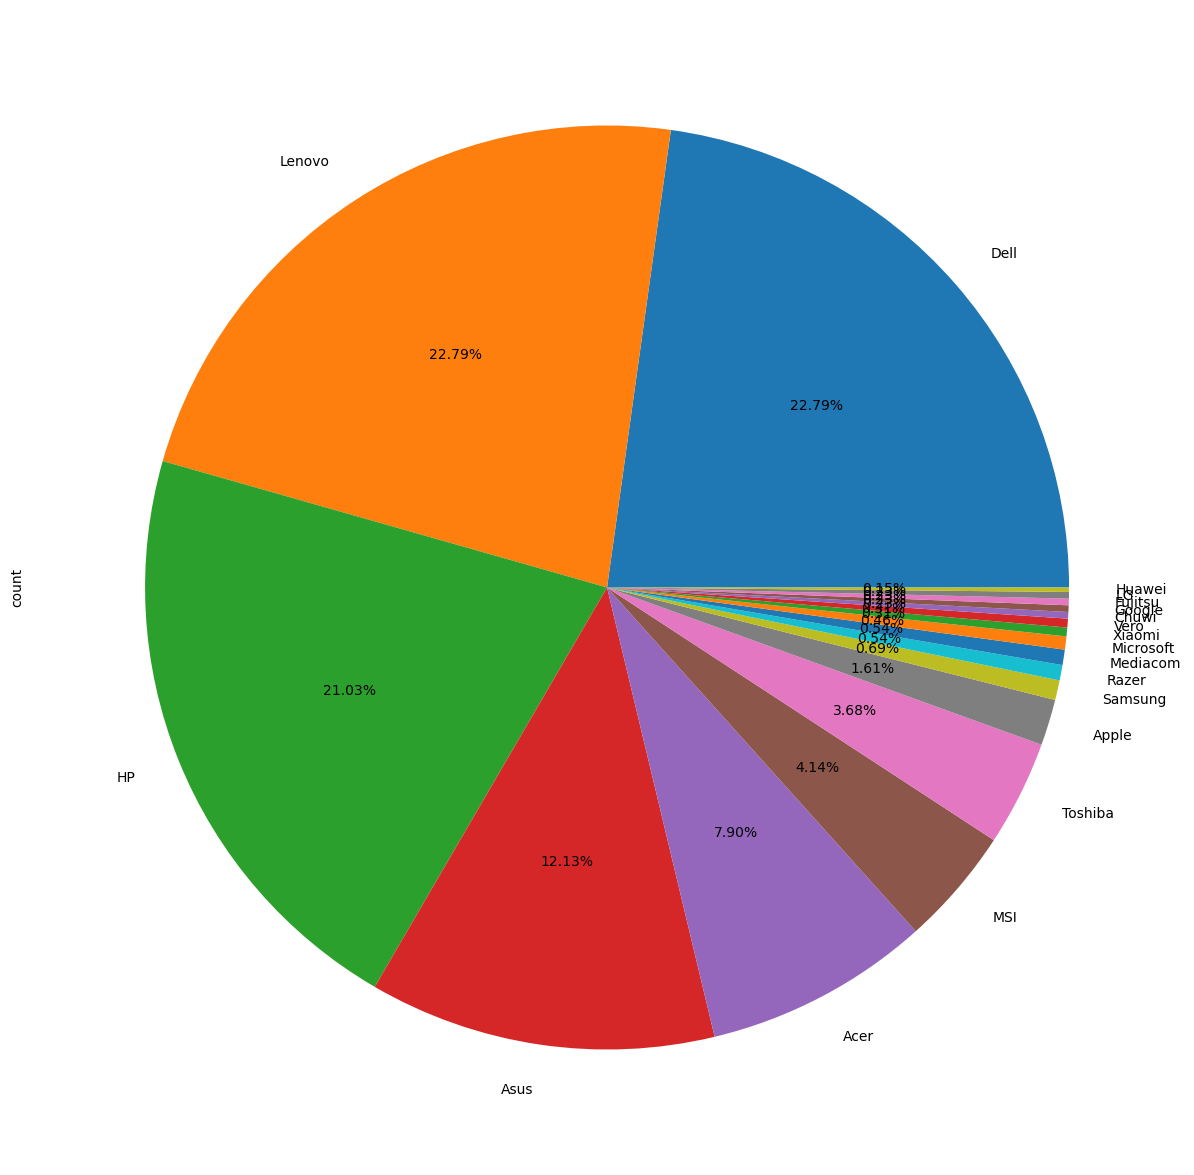

In [1235]:
plt.figure(figsize=(20,15))
df["Company"].value_counts().plot(kind="pie",autopct="%1.2f%%")

### the most 4 companies that had most versions of laptops
# . Dell
# .Lenovo
# .hp
# .Asus


In [1237]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Gpu',
       'OpSys', 'Weight', 'Price_euros', 'memory type', 'memory size',
       'Screen Type', 'Screen Resolution', 'GHz'],
      dtype='object')

In [1238]:
df.sort_values("Price_euros", ascending=False)[["Product", "Price_euros"]]

,Product,Price_euros
196,Blade Pro,6099.0
830,Blade Pro,5499.0
610,Thinkpad P51,4899.0
749,Zbook 17,4389.0
1066,ROG G701VO,3975.0
...,...,...
290,Chromebook C910-C2ST,199.0
31,E402WA-GA010T (E2-6110/2GB/32GB/W10),199.0
1120,V131 (X5-Z8350/4GB/32GB/FHD/W10),196.0
20,Vivobook E200HA,191.9


###    the most expensive laptops

<Axes: xlabel='Company'>

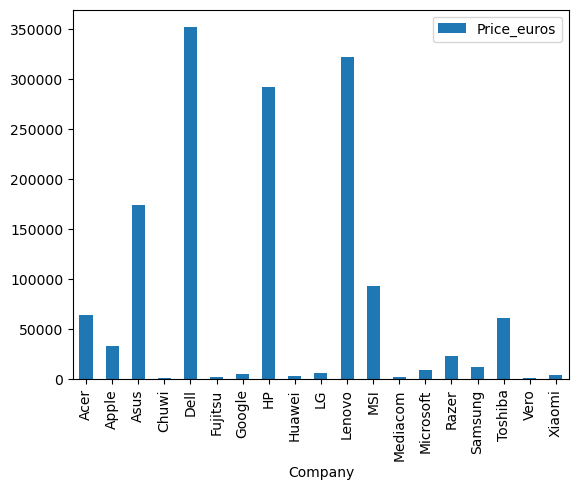

In [1240]:
df.groupby("Company")[["Price_euros"]].sum().plot(kind="bar")

### the same 4 compaines that had most versions of laptop are the same that had most 

In [1242]:
le=LabelEncoder()

In [1243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   Product            1303 non-null   object 
 2   TypeName           1303 non-null   object 
 3   Inches             1303 non-null   float64
 4   Cpu                1303 non-null   object 
 5   Ram                1303 non-null   object 
 6   Gpu                1303 non-null   object 
 7   OpSys              1303 non-null   object 
 8   Weight             1303 non-null   object 
 9   Price_euros        1303 non-null   float64
 10  memory type        1303 non-null   object 
 11  memory size        1303 non-null   int32  
 12  Screen Type        1303 non-null   object 
 13  Screen Resolution  1303 non-null   int64  
 14  GHz                1303 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(10)
memory usage: 147.7+ KB


In [1244]:
Company_le=le
TypeName_le=le
Ram_le=le
Memory_type_le=le
OpSys_le=le
Gpu_le=le
Screentype_le=le
Cpu_le=le

In [1245]:
df["Product"].nunique()

618

In [1246]:
df.drop("Product",axis=1,inplace=True)

### i didn't take the product columns becauses it has large unique names and the name of product will not effect the price

In [1248]:
df["Company"]=Company_le.fit_transform(df["Company"])
df["TypeName"]=TypeName_le.fit_transform(df["TypeName"])
df["Ram"]=Ram_le.fit_transform(df["Ram"])
df["memory type"]=Memory_type_le.fit_transform(df["memory type"])
df["OpSys"]=OpSys_le.fit_transform(df["OpSys"])
df["Gpu"]=Gpu_le.fit_transform(df["Gpu"])
df["Screen Type"]=Screentype_le.fit_transform(df["Screen Type"])
df["Cpu"]=Cpu_le.fit_transform(df["Cpu"])

In [1249]:
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False)
df["Weight"]=pd.to_numeric(df["Weight"])

In [1250]:
df

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,memory type,memory size,Screen Type,Screen Resolution,GHz
0,1,4,13.3,65,8,58,8,1.37,1339.69,5,128,5,4096000,2.3
1,1,4,13.3,63,8,51,8,1.34,898.94,0,128,0,1296000,1.8
2,7,3,15.6,74,8,53,4,1.86,575.00,5,256,3,2073600,2.5
3,1,4,15.4,85,1,9,8,1.83,2537.45,5,512,5,5184000,2.7
4,1,4,13.3,67,8,59,8,1.37,1803.60,5,256,5,4096000,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,10,0,14.0,89,5,47,5,1.80,638.00,5,128,9,2073600,2.5
1299,10,0,13.3,89,1,47,5,1.30,1499.00,5,512,11,5760000,2.5
1300,10,3,14.0,34,3,40,5,1.50,229.00,0,64,0,1049088,1.6
1301,7,3,15.6,89,7,21,5,2.19,764.00,2,1000,0,1049088,2.5


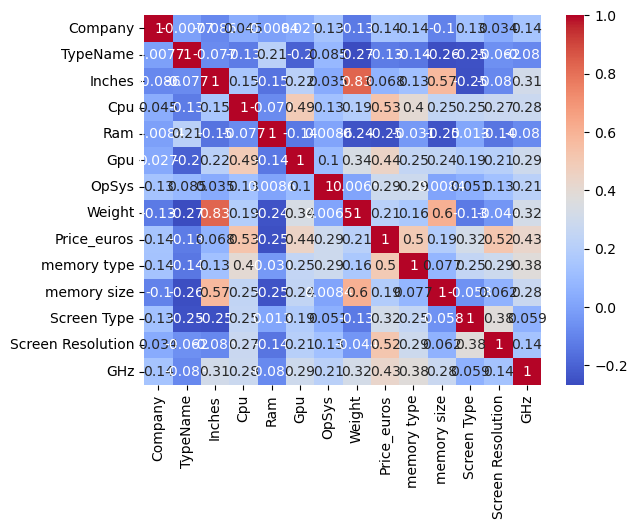

In [1251]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### here we can se that the most things that effect on the price and has strong relation is
## .Cpu
## .Gpu
## .ScreenReslution
### meduim relation is
## .Opsys
## .weight


In [1253]:
df.drop("Inches",axis=1,inplace=True)

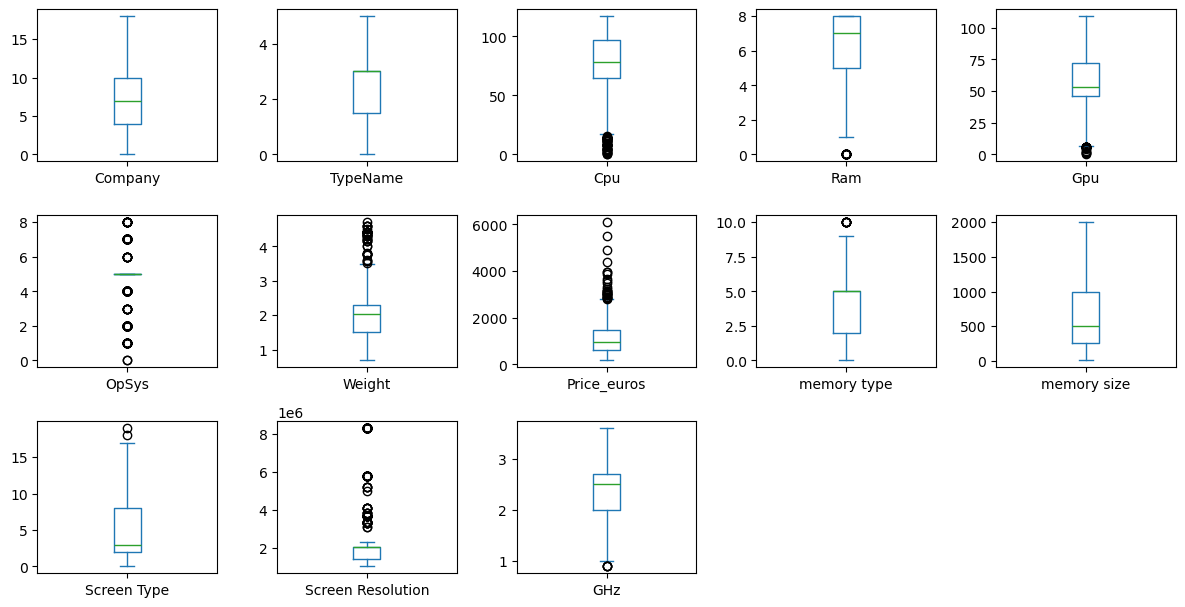

In [1254]:
df.plot(kind='box', subplots=True, figsize=(12, 8), layout=(4, 5))
plt.tight_layout()  
plt.show()

<Axes: xlabel='Screen Resolution'>

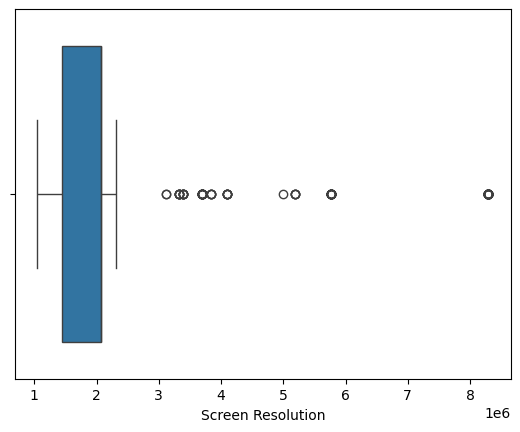

In [1255]:
sns.boxplot(x=df["Screen Resolution"])

<Axes: xlabel='Screen Resolution'>

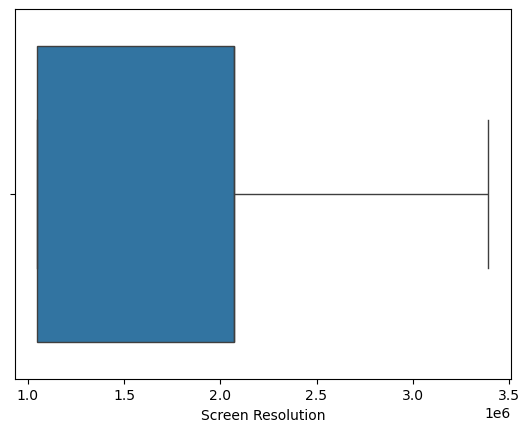

In [1256]:
df=df[df["Screen Resolution"]<3500000]
sns.boxplot(x=df["Screen Resolution"])

<Axes: xlabel='Weight'>

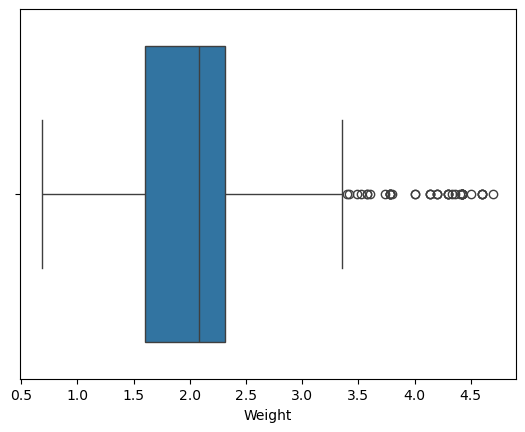

In [1257]:
sns.boxplot(x=df["Weight"])

<Axes: xlabel='Weight'>

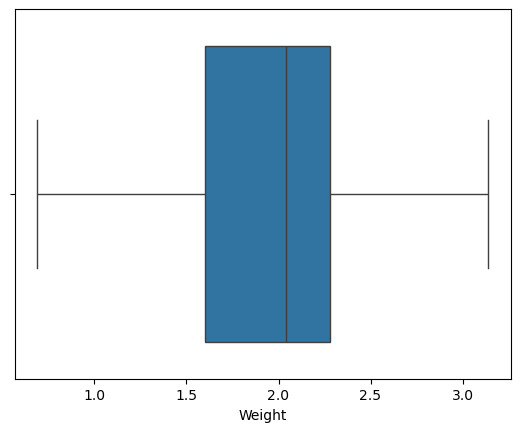

In [1258]:
df=df[df["Weight"]<3.2]
sns.boxplot(x=df["Weight"])

In [1259]:
X=df.drop("Price_euros",axis=1)
y=df["Price_euros"]

In [1260]:
X.columns

Index(['Company', 'TypeName', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'memory type', 'memory size', 'Screen Type', 'Screen Resolution',
       'GHz'],
      dtype='object')

In [1261]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [1262]:
model = GradientBoostingRegressor()

In [1311]:

ridge = Ridge(alpha=1.0)
gbr = GradientBoostingRegressor(n_estimators=800, learning_rate=0.1, max_depth=3)


stacked_model = StackingRegressor(
    estimators=[('gbr', gbr), ('ridge', ridge)],
    final_estimator=Ridge() 
)


stacked_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = stacked_model.predict(X_test)
r2_score = stacked_model.score(X_test, y_test)
print("R² Score:", r2_score)


R² Score: 0.8639264552782989
